In [1]:
import torch as t
import matplotlib.pyplot as plt

In [2]:
x = t.unsqueeze(t.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2*t.rand(x.size())

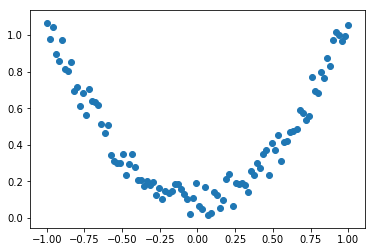

In [5]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [4]:
import torch.nn.functional as F

In [6]:
class Net(t.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = t.nn.Linear(n_feature, n_hidden)   
        # 隐藏层线性输出
        self.predict = t.nn.Linear(n_hidden, n_output)   
        # 输出层线性输出
    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

In [7]:
net = Net(n_feature=1, n_hidden=10, n_output=1)

In [8]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [9]:
# optimizer 是训练的工具
optimizer = t.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = t.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

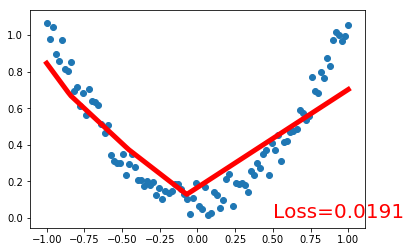

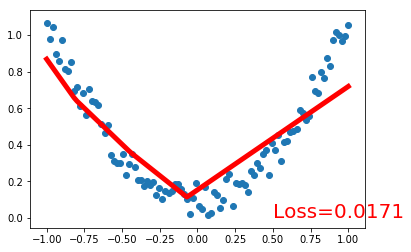

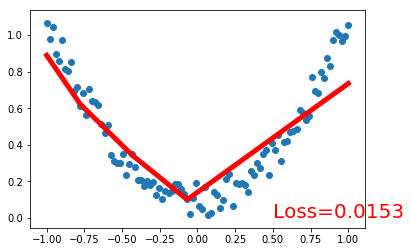

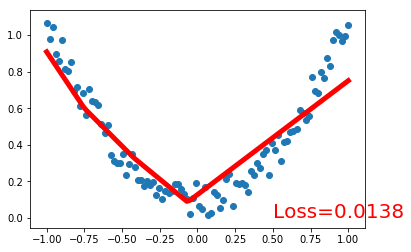

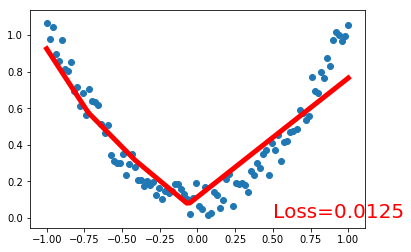

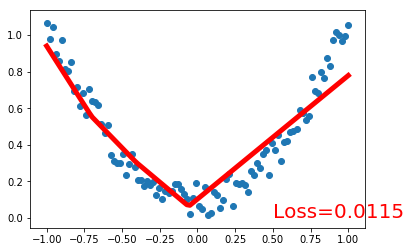

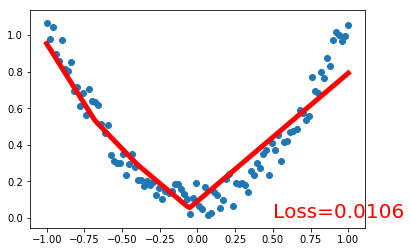

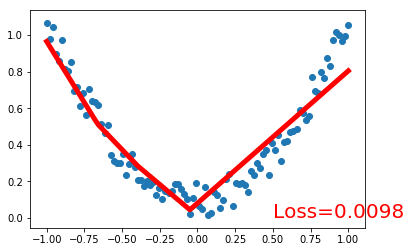

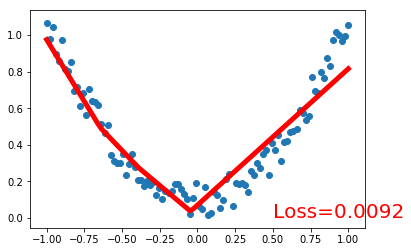

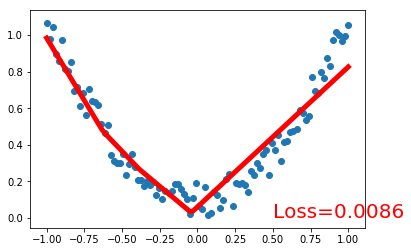

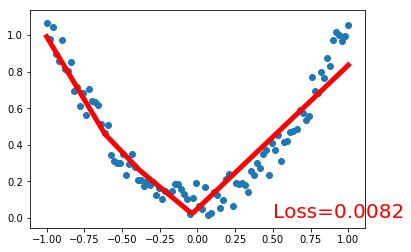

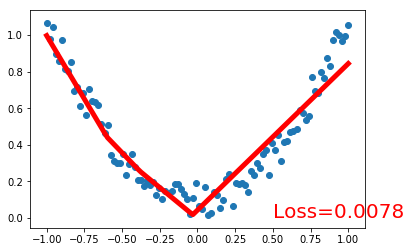

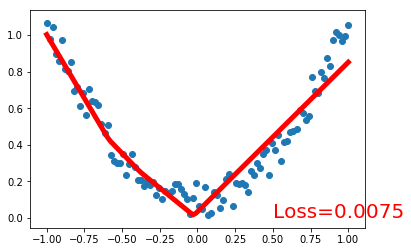

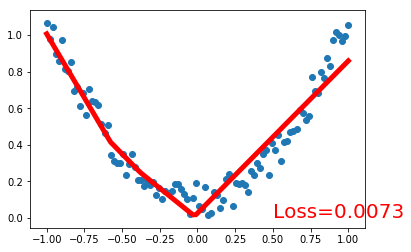

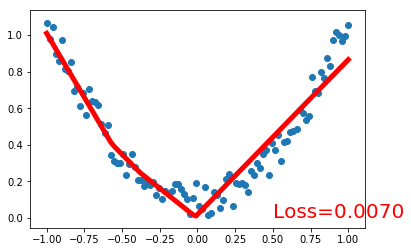

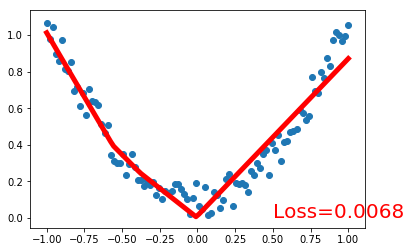

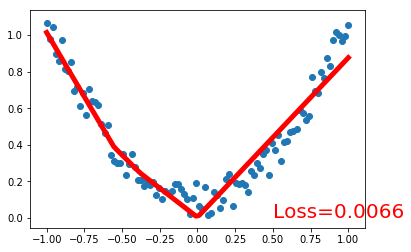

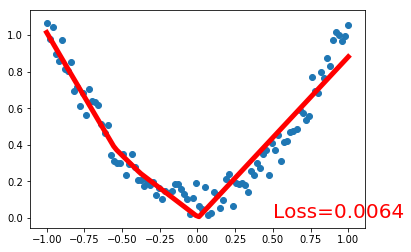

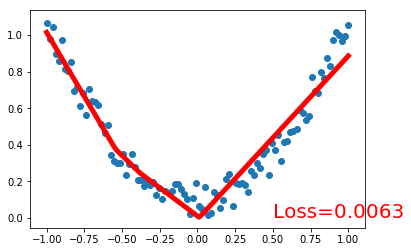

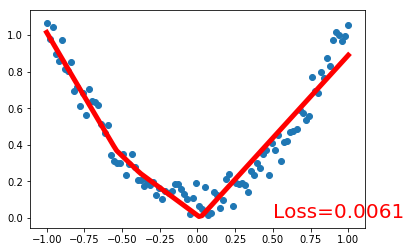

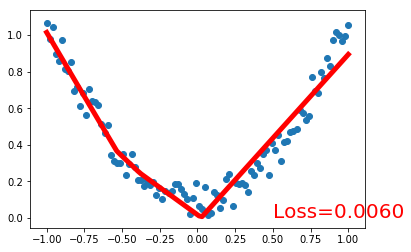

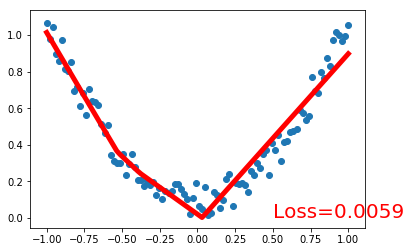

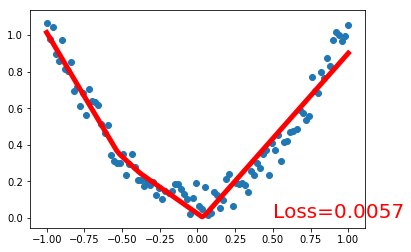

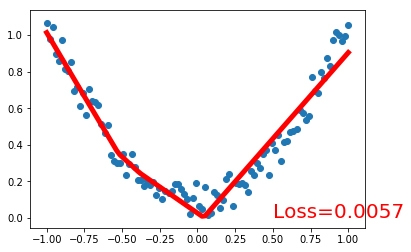

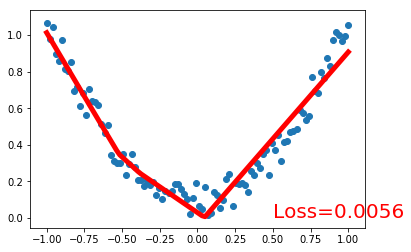

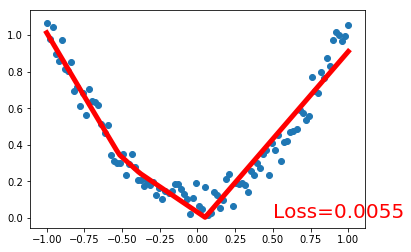

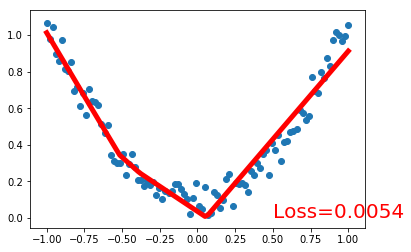

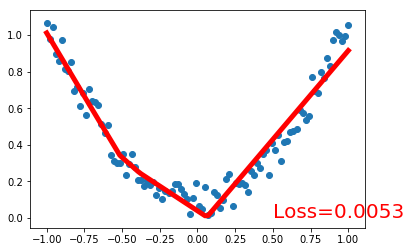

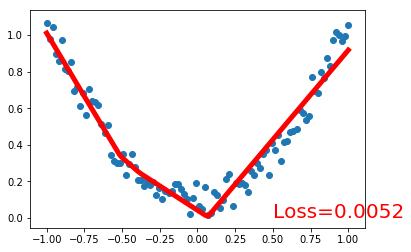

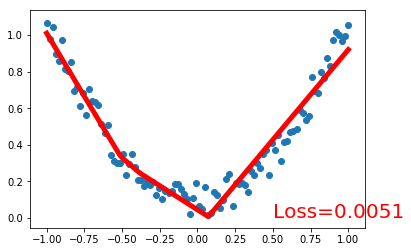

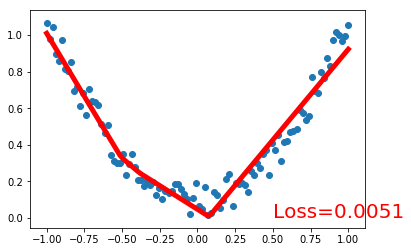

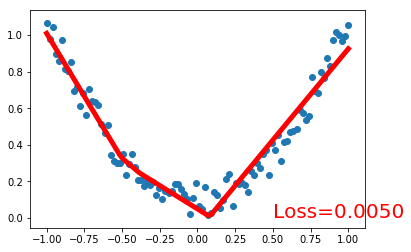

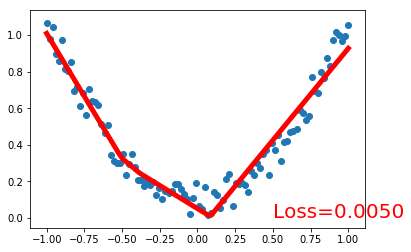

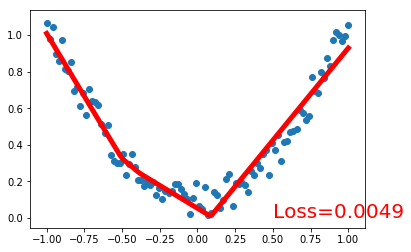

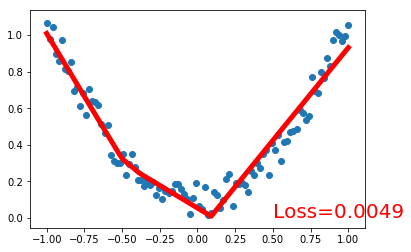

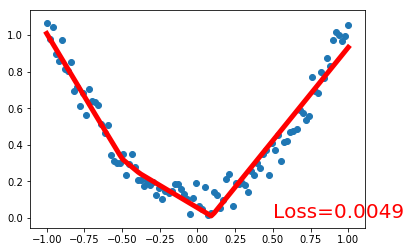

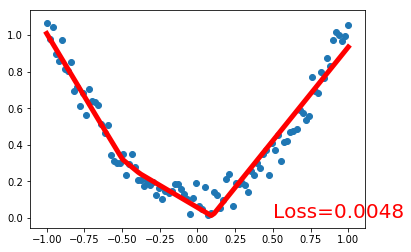

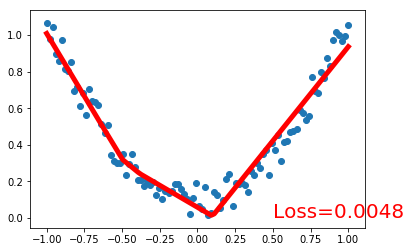

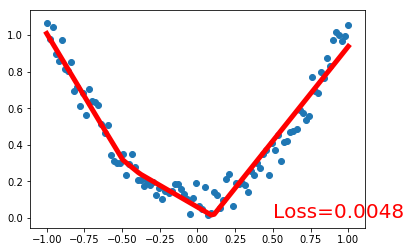

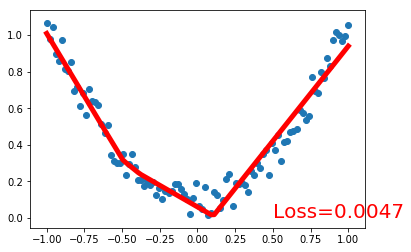

In [10]:
plt.ion()   # 画图
plt.show()

for t in range(200):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()  
    loss.backward()
    optimizer.step()

    # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)